<a href="https://colab.research.google.com/github/LEEINSEO-0118/Logo_Detection/blob/main/Logo_Detect_YOLOv8_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.2/699.2 kB 5.3 MB/s eta 0:00:00


In [2]:
import os
import fnmatch
import zipfile

from ultralytics import YOLO
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download Zip file

In [ ]:
# wget -O 옵션으로 Roboflow Project의 데이터 다운로드
f = open('/content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/url.txt', 'r')
zip_file_url = f.read()
f.close()
!wget -O Logo.zip $zip_file_url

In [5]:
# .zip으로 저장한 다음 압축을 풀면 이미지와 정답 데이터가 있는 train, valid, test 디렉토리를 확인 가능
with zipfile.ZipFile('/content/Logo.zip') as zip_ref:
    zip_ref.extractall('/content/Logo')

In [6]:
# 파일 경로 확인
!cat /content/Logo/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Logo']

roboflow:
  workspace: toad-lv4t5
  project: logo-detection-zaflz
  version: 3
  license: Public Domain
  url: https://universe.roboflow.com/toad-lv4t5/logo-detection-zaflz/dataset/3

# Load Model

In [7]:
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
print(type(model.names), len(model.names))
print(model.names)

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.8MB/s]

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [8]:
model.train(data = '/content/Logo/data.yaml', epochs = 90, patience = 30, batch = 20, imgsz = 640)

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Logo/data.yaml, epochs=90, time=None, patience=30, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 17.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Logo/train/labels... 161 images, 1 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 1056.77it/s]

train: New cache created: /content/Logo/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Logo/valid/labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 652.65it/s]

val: New cache created: /content/Logo/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      2.84G      2.011      3.325      2.082          4        640: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         41         41    0.00309      0.927      0.182     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      2.84G      1.609      2.876       1.82          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         41         41    0.00309      0.927      0.383      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      2.85G      1.478      2.364      1.675          2        640: 100%|██████████| 9/9 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         41         41    0.00309      0.927       0.45      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      2.84G      1.232      3.211       1.37          0        640: 100%|██████████| 9/9 [00:01<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         41         41      0.232      0.756      0.436      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      2.85G      1.366      2.199      1.569          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         41         41       0.54      0.487      0.484      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      2.84G      1.469      2.201      1.635          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         41         41      0.551      0.415      0.486      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      2.85G      1.505      2.187      1.604          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         41         41      0.302     0.0976     0.0963     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      2.85G      1.504      2.048      1.634          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         41         41      0.248      0.298       0.16     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      2.85G       1.56      2.038      1.791          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         41         41      0.354      0.293      0.252     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      2.85G      1.409      2.655      1.482          0        640: 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         41         41      0.172     0.0244     0.0161    0.00731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      2.85G      1.561      1.966      1.694          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         41         41      0.109      0.415      0.105      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      2.85G       1.66      2.076      1.768          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         41         41      0.306      0.293      0.265     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      2.85G      1.532      1.868       1.67          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         41         41      0.423      0.293      0.244     0.0818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      2.85G      1.602      1.901      1.741          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         41         41       0.28       0.39      0.247     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      2.85G      1.537      1.828      1.728          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         41         41      0.139      0.244      0.136     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      2.85G      1.557      1.885      1.771          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         41         41      0.215      0.439       0.18     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      2.85G      1.575      1.879      1.732          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         41         41      0.493      0.474      0.494      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      2.85G      1.576      1.746      1.706          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         41         41      0.632       0.61      0.563        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      2.85G       1.42      1.504      1.588          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         41         41      0.644      0.485      0.537      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      2.85G      1.445      1.456      1.593          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         41         41      0.327      0.366      0.271      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      2.85G      1.526      1.575      1.629          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         41         41       0.54      0.537       0.51       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      2.85G       1.46      1.442      1.618          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         41         41      0.343      0.659      0.361      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      2.85G      1.441      1.636      1.722          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         41         41      0.387      0.415      0.361      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      2.85G      1.503      1.582      1.615          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         41         41      0.663      0.512      0.577      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      2.85G      1.396      1.456      1.553          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         41         41      0.657      0.607      0.584      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      2.85G      1.533      1.513      1.581          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         41         41      0.529      0.561      0.569       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      2.85G      1.411      1.323      1.494          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         41         41       0.63      0.537       0.55      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      2.85G      1.316      1.298      1.522          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         41         41      0.614      0.659      0.659      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      2.85G      1.488      1.321      1.563          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         41         41       0.76      0.732      0.726      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      2.85G      1.342      1.322      1.526          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         41         41      0.607       0.64      0.604      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      2.85G      1.367      1.419      1.532          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         41         41      0.865      0.683      0.798      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      2.85G      1.273       1.21       1.46          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         41         41      0.705      0.732      0.741      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      2.85G      1.345       1.24      1.492          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         41         41      0.813      0.634      0.718      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      2.85G       1.26      1.195       1.46          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         41         41      0.813      0.683      0.742      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      2.85G      1.447      1.171      1.514          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         41         41      0.704      0.683      0.703      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      2.85G      1.312      1.185      1.449          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         41         41      0.722      0.695      0.712      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      2.85G      1.363      1.251      1.477          4        640: 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         41         41      0.746      0.683      0.729      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      2.85G      1.232      1.246      1.429          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         41         41      0.642      0.707      0.645      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      2.85G      1.357      1.191      1.485          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         41         41      0.852      0.634      0.769      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      2.85G      1.365      1.211      1.507          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         41         41      0.749      0.707      0.761      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      2.85G      1.408      1.444       1.51          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         41         41      0.869      0.683      0.816      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      2.85G      1.303      1.129      1.438          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         41         41      0.774       0.75      0.786      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      2.85G      1.355      1.214      1.486          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         41         41      0.836      0.756      0.868      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      2.85G      1.342      1.046      1.502          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         41         41      0.956      0.683      0.854      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      2.85G      1.234       1.21        1.4          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         41         41      0.914      0.778      0.877      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      2.85G       1.27      1.045      1.458          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all         41         41      0.818      0.766      0.844      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      2.85G      1.288      1.518      1.474          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         41         41       0.85      0.692      0.831      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      2.85G       1.25      1.049      1.422          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         41         41      0.829      0.732      0.836      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      2.85G      1.259      1.039      1.457          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         41         41      0.763      0.732      0.782      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      2.85G      1.114      1.014      1.363          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         41         41      0.767      0.683      0.782      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      2.85G      1.226      1.004      1.371          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         41         41      0.745      0.732      0.769      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      2.85G      1.093      1.086      1.357          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         41         41      0.701      0.743      0.753      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90      2.85G      1.175     0.9128      1.358          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         41         41      0.772      0.824       0.83      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      2.85G      1.105     0.9334      1.357          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         41         41        0.8      0.732       0.78      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/90      2.85G      1.049     0.9565      1.294          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         41         41      0.733      0.736       0.78       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/90      2.85G      1.196     0.9066      1.334          2        640: 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         41         41      0.854      0.756      0.868      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/90      2.85G      1.135     0.8482      1.503          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         41         41      0.844      0.792      0.827      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/90      2.85G       1.07     0.8812      1.325          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         41         41      0.861      0.753      0.837      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/90      2.85G      1.067     0.8604      1.298          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         41         41      0.879       0.78      0.874      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/90      2.85G      1.036     0.8671      1.274          3        640: 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         41         41      0.811      0.836      0.849      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/90      2.85G      1.076     0.9467      1.305          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         41         41      0.784      0.799      0.839      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/90      2.85G      1.045     0.8577      1.267          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         41         41      0.869      0.829      0.831      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/90      2.85G      1.064     0.8506      1.309          2        640: 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         41         41      0.849      0.829      0.844      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/90      2.85G      1.091     0.8626        1.3          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         41         41      0.867      0.683      0.766      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/90      2.85G      1.047     0.7993      1.244          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         41         41      0.822      0.683      0.785      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/90      2.85G     0.9904     0.8415      1.244          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         41         41      0.857      0.659      0.805      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/90      2.85G      1.053     0.8651      1.256          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         41         41      0.721      0.818      0.849      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/90      2.85G      1.095     0.7936       1.45          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         41         41       0.82      0.777      0.859      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/90      2.85G     0.9839      0.756       1.26          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         41         41      0.761      0.829      0.847      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/90      2.85G     0.9718     0.7251      1.247          3        640: 100%|██████████| 9/9 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         41         41      0.737       0.89      0.854      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/90      2.85G     0.9912     0.7892        1.3          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         41         41      0.767      0.854      0.856      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/90      2.85G      0.966     0.8067      1.225          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         41         41      0.865      0.779      0.859      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/90      2.85G     0.9577     0.8111       1.26          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         41         41      0.889      0.782      0.875      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/90      2.85G     0.8519      1.031       1.09          0        640: 100%|██████████| 9/9 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         41         41      0.908       0.78      0.887      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/90      2.85G     0.9578      1.118      1.282          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         41         41       0.94      0.764      0.899      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/90      2.85G     0.9328     0.7036        1.2          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         41         41      0.985      0.732      0.898      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/90      2.85G      1.036     0.9038       1.31          2        640: 100%|██████████| 9/9 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         41         41      0.959      0.756      0.894       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/90      2.85G     0.9554     0.7351      1.178          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         41         41      0.969      0.775      0.895      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/90      2.85G     0.9075     0.7322      1.182          4        640: 100%|██████████| 9/9 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         41         41      0.838      0.755      0.834      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/90      2.85G     0.8814     0.6708      1.155          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         41         41      0.798      0.732      0.808      0.477


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/90      2.85G      1.005     0.7783      1.263          1        640: 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         41         41      0.704      0.812      0.814      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/90      2.85G      0.711     0.5903      1.125          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         41         41      0.724      0.767      0.814      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/90      2.85G     0.9861     0.8328      1.382          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         41         41      0.912      0.707      0.843      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/90      2.85G     0.7709     0.5712      1.107          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         41         41      0.881      0.732      0.871      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/90      2.85G     0.8541      0.563      1.238          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         41         41      0.915      0.756      0.862      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      86/90      2.85G     0.8715      1.202      1.192          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         41         41      0.882      0.756      0.851      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      87/90      2.85G     0.7249     0.5233      1.132          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         41         41      0.957      0.756      0.866      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      88/90      2.85G     0.7479     0.5379      1.139          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         41         41      0.943      0.803      0.878      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      89/90      2.85G     0.7486     0.5943      1.197          1        640: 100%|██████████| 9/9 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         41         41      0.915      0.789      0.906      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      90/90      2.85G     0.7087     0.5512       1.15          1        640: 100%|██████████| 9/9 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         41         41      0.958       0.78      0.908      0.518



90 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]


                   all         41         41       0.94      0.765        0.9      0.528
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f25ac221c60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Inference


In [27]:
results = model.predict('/content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image', conf = 0.1, iou = 0.5, save = True)


image 1/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/Jeep.jpeg: 640x640 2 Logos, 9.7ms
image 2/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/Nongsim.jpeg: 640x640 2 Logos, 9.3ms
image 3/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/Ryun.png: 640x640 2 Logos, 9.3ms
image 4/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/adidas.jpeg: 640x640 4 Logos, 8.8ms
image 5/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/adidas_2.jpeg: 640x640 1 Logo, 8.5ms
image 6/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/adidas_3.jpeg: 640x640 1 Logo, 9.0ms
image 7/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/asics.jpeg: 640x640 1 Logo, 9.5ms
image 8/20 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image/beverlyhills.jpeg: 640x640 1 Logo, 9.9ms
image 9/20 /content/dr

test folder : train6


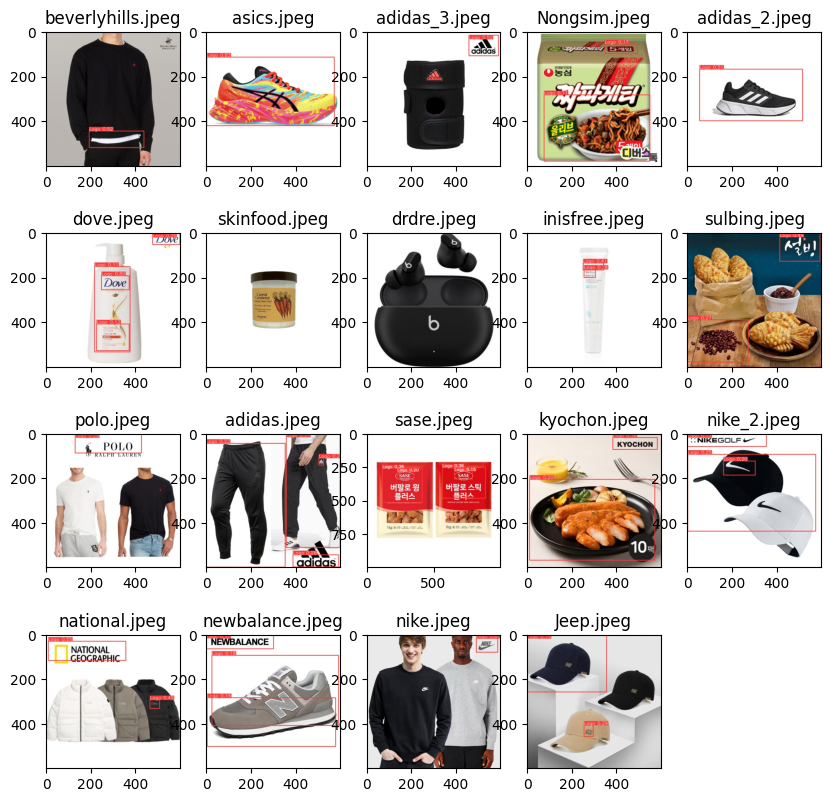

In [29]:
for file_name in os.listdir(f'/content/runs/detect'):
    test_folder = file_name
    break
test_folder = 'train6'
print(f'test folder : {test_folder}')

fig = plt.figure(figsize=(10, 10))
rows = 4
cols = 5
i = 1

for file_name in os.listdir(f'/content/runs/detect/{test_folder}'):
    if fnmatch.fnmatch(file_name, '*.jpeg*'):
        image = cv2.imread(f'/content/runs/detect/{test_folder}/{file_name}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(image)
        ax.title.set_text(file_name)
        i += 1
plt.show()